<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

필기체 숫자데이터를 분류하는 Convolutional Neural Network (CNN) 모델을 만들어봅시다.

Using TensorFlow backend.


train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


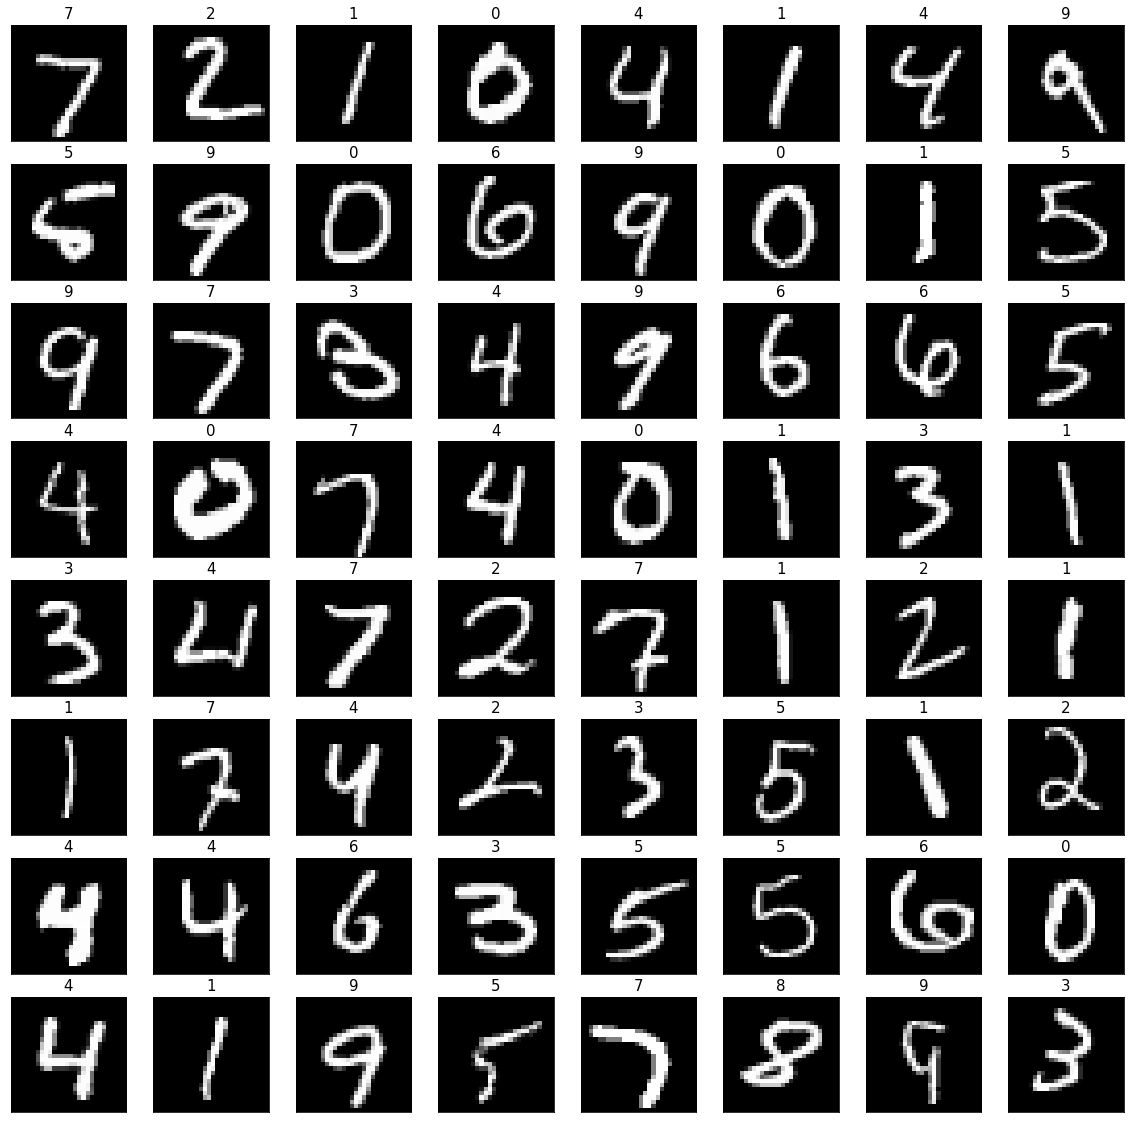

In [1]:
from keras import datasets, layers, models, utils
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( test_labels[i], {'fontsize':15} )
    plt.imshow( test_images[i], cmap="gray" )

2차원 이미지를 채널 차원이 있는 3차원 데이터로 만들어 줍니다. backend 의 image_data_format 이 channels_first 인 경우는 (batch, channels, height, width) 로 만들어 주어야하고 channels_last 인 경우는 (batch, height, width, channels) 로 만들어 주어야합니다.. Tensorflow backend 를 사용하는 경우는 channels_last 가 디폴트 옵션입니다. 다음은 이미지 데이터를 channels_last 에 맞추어주는 경우입니다.

In [2]:
K.set_image_data_format( 'channels_last' )
print( K.image_data_format() )

_, h, w = train_images.shape
train_x = ( train_images.reshape(-1, h, w, 1) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, h, w, 1) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

channels_last
test_x <class 'numpy.ndarray'> (10000, 28, 28, 1) float32


레이블을 열개의 카테고리를 가진 데이터로 바꾸어 줍니다.

In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000,) uint8
test_labels[0] = 7
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Convolution을 수행하는 Conv2D와 이미지의 크기를 줄이는 MaxPooling2D를 사용하여 모델을 만듭니다. channels_last 로 셋팅을 했으므로 모델 summary 를 보면 Conv2D 출력의 shape 이 (Batch, height, width, depth) 임을 알 수 있습니다.

In [4]:
x = layers.Input(shape=(h, w, 1))
h = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
h = layers.MaxPooling2D(pool_size=(2, 2))(h)
h = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(h)
h = layers.MaxPooling2D(pool_size=(2, 2))(h)
h = layers.Flatten()(h)
h = layers.Dense(units=128, activation='relu')(h)
h = layers.Dropout(0.5)(h)
y = layers.Dense(units=num_classes, activation='softmax')(h)

model = models.Model(x,y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

softmax를 거친 category 출력에 주로 사용하는 categorical_crossentropy loss 함수를 사용합니다. 학습의 중간 결과로 정확성도 출력하기 위하여 accuracy 라는 측정 항목을 지정해 줍니다.

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 7s 134us/step - loss: 0.3159 - acc: 0.9035 - val_loss: 0.0617 - val_acc: 0.9810
Epoch 2/15
54000/54000 [==============================] - 4s 73us/step - loss: 0.1009 - acc: 0.9699 - val_loss: 0.0469 - val_acc: 0.9860
Epoch 3/15
54000/54000 [==============================] - 4s 73us/step - loss: 0.0756 - acc: 0.9776 - val_loss: 0.0422 - val_acc: 0.9878
Epoch 4/15
54000/54000 [==============================] - 4s 74us/step - loss: 0.0620 - acc: 0.9811 - val_loss: 0.0404 - val_acc: 0.9892
Epoch 5/15
54000/54000 [==============================] - 4s 74us/step - loss: 0.0517 - acc: 0.9848 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 6/15
54000/54000 [==============================] - 4s 74us/step - loss: 0.0453 - acc: 0.9860 - val_loss: 0.0361 - val_acc: 0.9895
Epoch 7/15
54000/54000 [==============================] - 4s 74us/step - loss: 0.0411 - acc: 0.9872 - val_loss: 0.0347 - val_acc

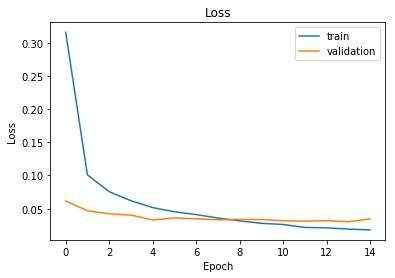

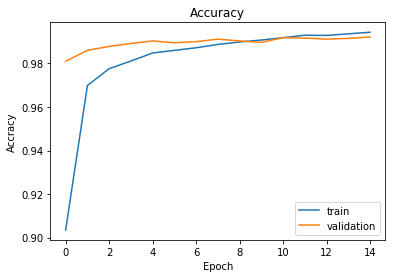

10000/10000 [==============================] - 0s 28us/step
[loss, accuracy] = [0.021386391571942658, 0.9929]


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=15, batch_size=128, validation_split=0.1)

from modules.plot_history import plot_loss, plot_acc
plot_loss(hist, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

evaluation = model.evaluate( test_x, test_y, batch_size=128)
print( '[loss, accuracy] =', evaluation )

검증데이터로 모델에 입력을 넣어 어떠한 출력이 나오는지 확인해봅시다.

y_pred (10000, 10) float32
y_pred[0] [4.5880747e-15 1.3182491e-11 5.5488607e-11 2.7892022e-10 7.6890322e-15
 6.9562163e-16 2.4886671e-22 1.0000000e+00 1.0929539e-12 5.4420268e-10]
class_pred (10000,) int64
class_pred[0] 7


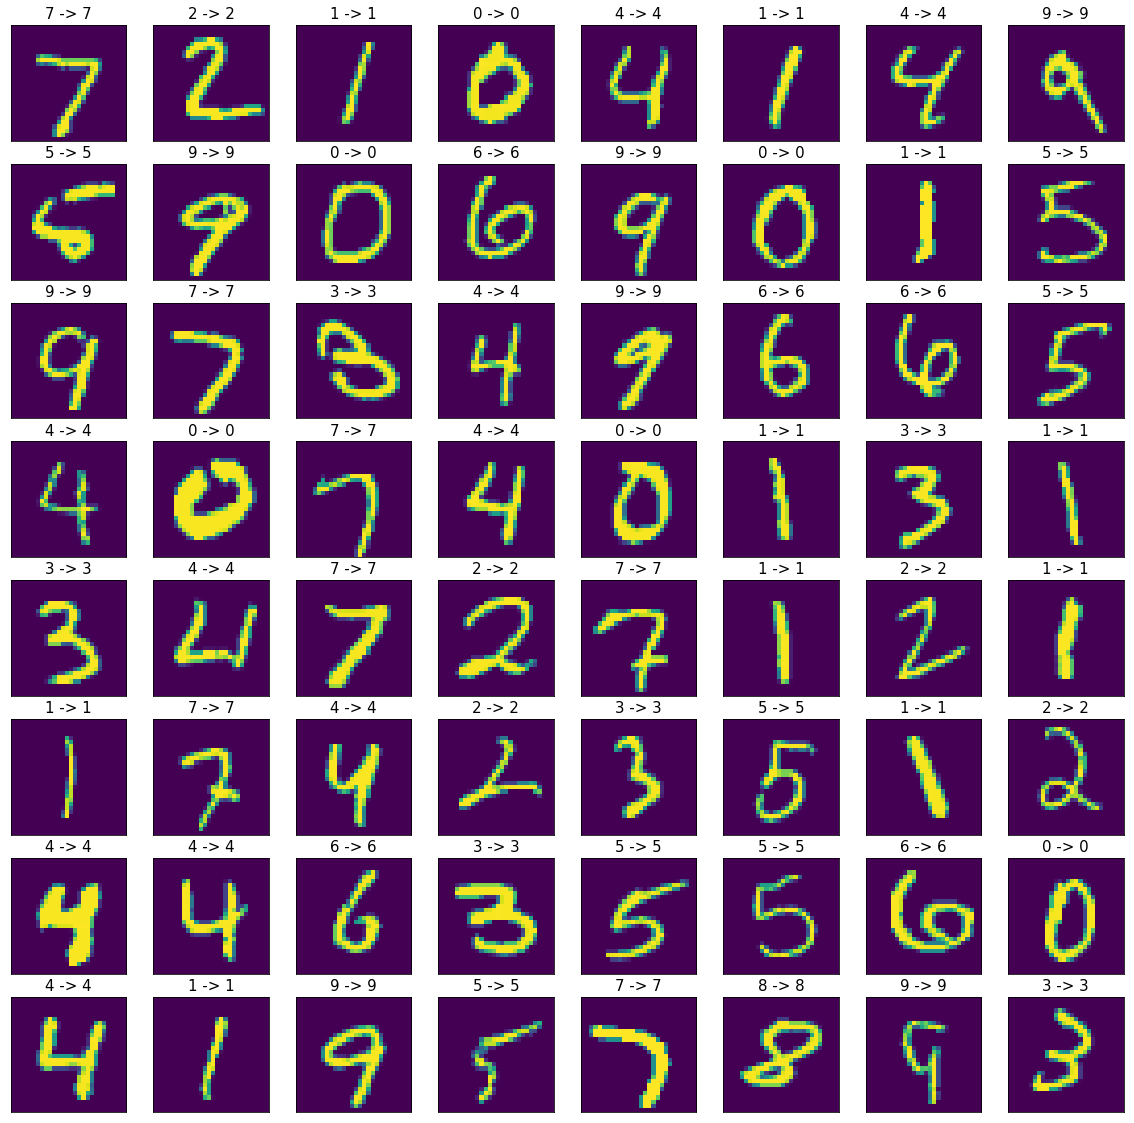

In [6]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( str(test_labels[i]) + ' -> ' + str(class_pred[i]), {'fontsize':15} )
    plt.imshow( test_images[i] )

학습한 모델을 저장합니다.

In [7]:
model.save('mnist_model_channels_last.h5')